In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [2]:
# Dependencies and Setup
%matplotlib inline

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
no_of_mice = merge_df.loc[merge_df.Timepoint == 0].count()
no_of_mice

Mouse ID              250
Drug Regimen          250
Sex                   250
Age_months            250
Weight (g)            250
Timepoint             250
Tumor Volume (mm3)    250
Metastatic Sites      250
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [6]:
merge_group = merge_df.groupby(["Mouse ID", "Timepoint"])
merge_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

In [66]:
duplicate_mouse = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [69]:
merge_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.

In [70]:
no_of_mice = merge_df.loc[merge_df.Timepoint == 0].count()
no_of_mice

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [14]:
drug_group = merge_df.groupby(["Drug Regimen"])
drug_group.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [15]:
mean_tumor_volume = drug_group["Tumor Volume (mm3)"].mean()

In [16]:
median_tumor_volume = drug_group["Tumor Volume (mm3)"].median()

In [17]:
tumor_volume_variance = drug_group["Tumor Volume (mm3)"].var()

In [18]:
tumor_volume_std_dev = drug_group["Tumor Volume (mm3)"].std()

In [19]:
tumor_volume_std_err = drug_group["Tumor Volume (mm3)"].sem()

In [20]:
tumor_volume_df = pd.DataFrame({ "Mean Tumor Volume": mean_tumor_volume, 
                   "Median Tumor Volume": median_tumor_volume, 
                   "Tumor Volume Variance": tumor_volume_variance,
                  "Tumor Volume Std. Dev.": tumor_volume_std_dev,
                  "Tumor Volume Std. Err.": tumor_volume_std_err})
tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
drug_group.describe()

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          161.0  10.894410  7.304624  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          161.0  27.043478  ...          56.184664  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                161.0  0.975155  1.083688  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

In [71]:
counts = merge_df["Drug Regimen"].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

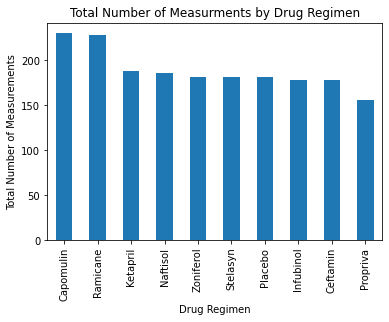

In [75]:
bar_plot = counts.plot(kind='bar')
plt.title("Total Number of Measurments by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

In [81]:
x_axis = counts.index.values
y_axis = counts.values

Text(0, 0.5, 'Total Number of Measurements')

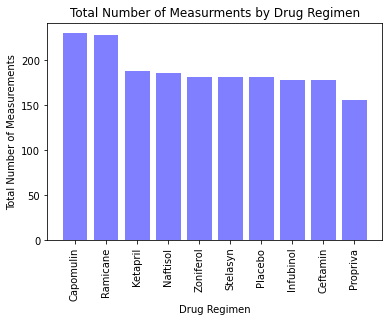

In [82]:
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Total Number of Measurments by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = merge_df["Sex"].value_counts()
mice_sex

Male      958
Female    935
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

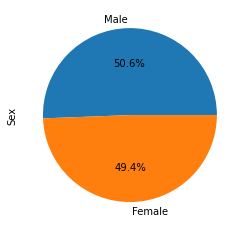

In [105]:
mice_sex_pie_pd = mice_sex.plot(kind='pie', autopct="%1.1f%%")
mice_sex_pie_pd

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

([<matplotlib.patches.Wedge at 0x7fb67ec1dfd0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

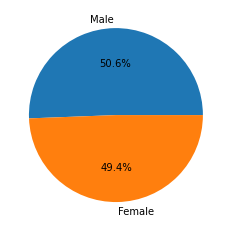

In [109]:
plt.pie(mice_sex, labels=mice_sex.index, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = pd.DataFrame(merge_df.groupby(["Mouse ID"])["Timepoint"].max())
final_timepoint

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [91]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = final_timepoint.merge(merge_df, on=['Mouse ID', 'Timepoint'], how='left')
max_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []


for drug in drugs:
    
     # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_df=max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    #add subset
    drug_values.append(tumor_volume_df)
    
     # Determine outliers using upper and lower bounds
    quartiles = tumor_volume_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    #print(f'IQR for {drug}: {iqr}')  
        
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f'Lower Bound for {drug}: {lower_bound}')
    #print(f'Upper Bound for {drug}: {upper_bound}')
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    outliers = tumor_volume_df.loc[(tumor_volume_df < lower_bound) | (tumor_volume_df > upper_bound)]
    print(f"{drug} has outliers of {outliers}")

Capomulin has outliers of Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane has outliers of Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol has outliers of 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has outliers of Series([], Name: Tumor Volume (mm3), dtype: float64)


([<matplotlib.axis.XTick at 0x7fb67ef7f670>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

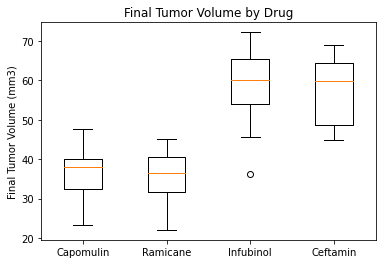

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_values, labels=drugs)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
locate_capomulin=merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
locate_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [97]:
mouse = locate_capomulin.loc[locate_capomulin["Mouse ID"] == "s185"]
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 1.0, 'Capomulin Treatment of Mouse s185')

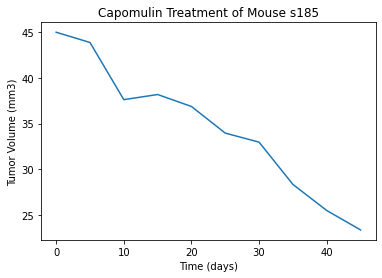

In [98]:
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [56]:
capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [58]:
#https://github.com/benanza/Pymaceuticals/blob/master/Pymaceuticals.ipynb
average_tumor_volume_capomulin = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
average_tumor_volume_capomulin

,Mouse ID,avg_tumor_vol
0,s185,34.559143
1,m601,34.847470
2,x401,36.182040
3,f966,36.505973
4,r554,36.509212
5,y793,38.506829
6,m957,39.049816
7,i738,39.141053
8,t565,39.328725
9,u364,39.887495


In [60]:
average_tumor_volume_capomulin = pd.merge(capomulin_df, average_tumor_volume_capomulin, on='Mouse ID')
average_tumor_volume_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,avg_tumor_vol
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143
...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,45.798970


Text(0.5, 1.0, 'Average Tumor Volume by Weight')

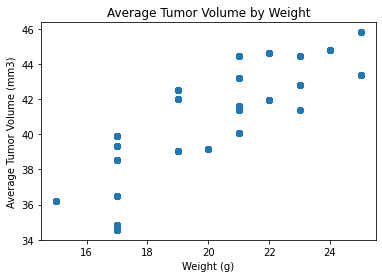

In [62]:
x = average_tumor_volume_capomulin['Weight (g)']
y = average_tumor_volume_capomulin['avg_tumor_vol']

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

## Correlation and Regression

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x, y)
correlation

(0.8343958614425948, 6.49573765613983e-61)

Text(0.5, 1.0, 'Average Tumor Volume by Weight')

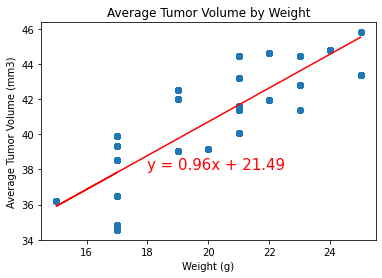

In [104]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')